In [51]:
%matplotlib inline

## Home Assigment 1, part 1 (due 09/09/2021)

### Linear Regression 

In this home assigment you will implement Linear Regression 
by 
<ol>
<li> Gradient Descent</li>
<li> Normal Equations</li>
</ol>    
    
You will work with the diabetes database, (see https://scikit-learn.org/stable /datasets/toy_dataset.html#diabetes-dataset for the description). In the following tasks use only one feature.<br> 

You should submit the following:
<ol>
<li> This notebook with implementation of the following functions:</li>
    <ol>        
    <li> myfit, which calculates the optimal parameter vector iteratively, θ̄gd.</li>        
    <li> myfitNormalEquations, which calculates the optimal parameter vector analytically, θ̄ne.</li>        
    <li> mypredict, which predicts y from x and θ̄gd.</li>        
    </ol>
(look at the lines 36-56 for details)
        <li> A plot of norm(θ̄ne - θ̄gd[i]) as a function of iteration, i, in Gradient Descent, where θ̄ne is the optimal solution by myfitNormalEquations, and θ̄gd[i] is the parameter vector at the i-th iteration of 'myfit'. If norm(θ̄ne - θ̄gd[i]) does not go to zero, tune the learning rate and the number of iterations until it does go to zero (1e-5 is good enough).
    </li>
<li> A plot of the loss, J(θ), as a function of iteration, i. See the lecture notes regarding J(θ). Add legend to the plot showing the value of α and the corresponding iteration number at the convergence (e.g., 'α=0.03, iter=52'), which is when norm(θ̄ne - θ) is around zero.</li> 
<li> A scatter plot of diabetes_y_train vs diabetes_x_train with blue dotes, and three linear regression lines in different colors for θ̄gd at 3 different stages of Gradient Descent: beginning, middle, 'end' on the same scatter plot. <br>
    Add legend mentioning 'beginning', 'middle', 'end'. 
<li> Explain briefly your observations in '5' in the next cell after the cell showing the plots.<br>
    (See https://www.markdownguide.org/basic-syntax for the markdown syntax.) 
</ol>    




In [52]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause

Automatically created module for IPython interactive environment


In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [54]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [55]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

Mean squared error: 2548.07


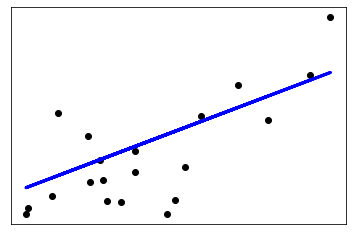

In [56]:
def myfitNormalEquations(diabetes_X_train, diabetes_y_train):
    X = diabetes_X_train
    y = diabetes_y_train
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)

    # Calculating weights of the fitting line 
    A = np.dot(Xbar.T, Xbar)
    b = np.dot(Xbar.T, y)
    theta = np.dot(np.linalg.pinv(A), b)
    return theta

theta_norm = myfitNormalEquations(diabetes_X_train, diabetes_y_train)
theta_norm = theta_norm.reshape(len(theta_norm), 1)

def mypredict(X_test, theta):
    X = X_test
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)
    return np.dot( Xbar, theta)
    
diabetes_y_pred_norm = mypredict(diabetes_X_test, theta_norm)


# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred_norm))


# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred_norm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Mean squared error: 2548.07


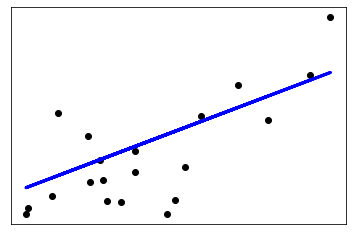

In [57]:
# implement function 'myfit' using the Batched Gradient Descent Algorithm,
# myfit accepts three argiments diabetes_X_train, diabetes_y_train,
# and learnig rate, α. It returns the optimal parameter vector, θ̄gd
# Initialize θgd to a random vector.

# run your function to find the optimal parameter vector:
##### θ̄gd = myfit(diabetes_X_train, diabetes_y_train, α)

# implement function 'myfitNormalEquations', see the lecture notes. 
# myfitNormalEquations accepts two argiments diabetes_X_train, 
# diabetes_y_train. It returns the optimal parameter vector, θ̄ne
##### θ̄ne = myfitNormalEquations(diabetes_X_train, diabetes_y_train)

# implement function 'mypredict', (we denoted it by h(x) in the class)
###
### Reminder: h(x, θ) = \sumᵢ xᵢ*θᵢ for i in [0, K], and x0 = 1
###
# mypredict accepts one argiment diabetes_X_test. It returns the 
# predicetd values for y,  mydiabetes_y_pred
# run your function mypredict
##### mydiabetes_y_pred = mypredict(diabetes_X_test)
costs = []
theta_diff = []
thetas = []
def myfit(diabetes_X_train, diabetes_y_train, learning_rate):
    X = diabetes_X_train
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)
    m = Xbar.shape[0] #row = # number samples
    N = Xbar.shape[1] #column # number of features

    y = diabetes_y_train.reshape(m, 1) # y missing second dimension, force adding it


    theta = np.random.rand(N, 1)# * 0.01
    iterations = 40000

    for i in range(iterations):
        yhat = np.dot(Xbar, theta)
        temp = yhat - y
        theta_gd = 1 / m * np.dot(Xbar.T, temp)
        theta = theta - learning_rate * theta_gd
        cost = 1 / m * np.dot(temp.T, temp)
        costs.append(cost)
        
        diff = np.linalg.norm(theta_norm - theta)
        theta_diff.append(diff)
        if i == 0:
            thetas.append(theta)
        elif i == iterations / 2: 
            thetas.append(theta)
            
    return theta

learning_rate = 0.1
theta = myfit(diabetes_X_train, diabetes_y_train, learning_rate)

diabetes_y_pred = mypredict(diabetes_X_test, theta)
diabetes_y_begin_pred = mypredict(diabetes_X_test, thetas[0])
diabetes_y_mid_pred = mypredict(diabetes_X_test, thetas[1])

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred_norm))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred_norm, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

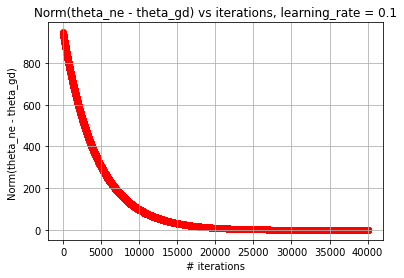

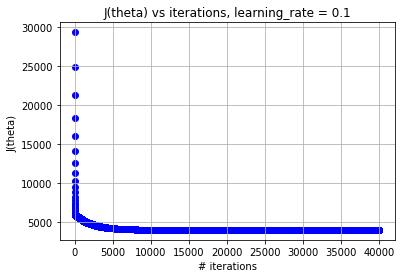

In [58]:
# Plot norm #############################################
plt.scatter(range(len(theta_diff)), theta_diff,  color='red')

plt.xticks(())
plt.yticks(())
plt.yscale('linear')
plt.xscale('linear')
plt.title('Norm(theta_ne - theta_gd) vs iterations, learning_rate = {}'.format(learning_rate))
plt.xlabel("# iterations")
plt.ylabel("Norm(theta_ne - theta_gd) ")
plt.grid(True)
plt.show()
#############################################

# Plot costs #############################################
plt.scatter(range(len(costs)), costs,  color='blue')
plt.xticks(())
plt.yticks(())
plt.yscale('linear')
plt.xscale('linear')
plt.title('J(theta) vs iterations, learning_rate = {}'.format(learning_rate))
plt.xlabel("# iterations")
plt.ylabel("J(theta) ")
plt.grid(True)
plt.show()

Mean squared error: 2548.20


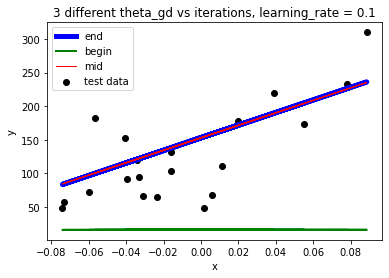

In [59]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))


# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black', label='test data')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=5, label='end')
plt.plot(diabetes_X_test, diabetes_y_begin_pred, color='green', linewidth=2, label='begin')
plt.plot(diabetes_X_test, diabetes_y_mid_pred, color='red', linewidth=1, label='mid')




plt.xticks(())
plt.yticks(())
plt.legend(loc="upper left")
plt.yscale('linear')
plt.xscale('linear')
plt.title('3 different theta_gd vs iterations, learning_rate = {}'.format(learning_rate))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# add your plots here

## Observation

### Iteration explaination
From graph, when plotting the loss (J) vs the interations. As more iterations increase, the loss value goes down as we are closer to the local optimal point. 

Normal equation: calculate the  value using the equation, but it applies for the small scale. With the large scale, it is hard to calculate in the computer.

Gradient descent is a optimization method to find the local minimal via going through multiple iterations.

When observing the norm plot, the graph shows the line approach to zero. In order words, the experiment value of theta is very close to the theoretical value calculating by the norm method.

For the loss plot, the graph do not show that the loss value decrease over iterations, and eventually stablize after sometimes.

For Graph below, α=0.03, iter=52, the loss value after 52 iterations is the same as the above graph when learning rate is 0.1 and iterations is 40000. This means with this learning rate of 0.03, we only need to iterate through the process 52 times to get to the optimal value.


In [60]:

# Trying 'α=0.03, iter=52', A plot of the loss, J(θ), as a function of iteration, i. 
#See the lecture notes regarding J(θ). 
# Add legend to the plot showing the value of α and the corresponding iteration number at
#the convergence (e.g., 'α=0.03, iter=52'), which is when norm(θ̄ne - θ) is around zero.###########


costs = []
theta_diff = []
thetas = []
def myfit(diabetes_X_train, diabetes_y_train, learning_rate):
    X = diabetes_X_train
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)
    m = Xbar.shape[0] #row = # number samples
    N = Xbar.shape[1] #column # number of features

    y = diabetes_y_train.reshape(m, 1) # y missing second dimension, force adding it


    theta = np.random.rand(N, 1)# * 0.01
    iterations = 52

    for i in range(iterations):
        yhat = np.dot(Xbar, theta)
        temp = yhat - y
        theta_gd = 1 / m * np.dot(Xbar.T, temp)
        theta = theta - learning_rate * theta_gd
        cost = 1 / m * np.dot(temp.T, temp)
        costs.append(cost)
        
        diff = np.linalg.norm(theta_norm - theta)
        theta_diff.append(diff)
        if i == 0:
            thetas.append(theta)
        elif i == iterations / 2: 
            thetas.append(theta)
            
    return theta

learning_rate = 0.03
theta = myfit(diabetes_X_train, diabetes_y_train, learning_rate)

diabetes_y_pred = mypredict(diabetes_X_test, theta)
diabetes_y_begin_pred = mypredict(diabetes_X_test, thetas[0])
diabetes_y_mid_pred = mypredict(diabetes_X_test, thetas[1])

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred_norm))

Mean squared error: 2548.07


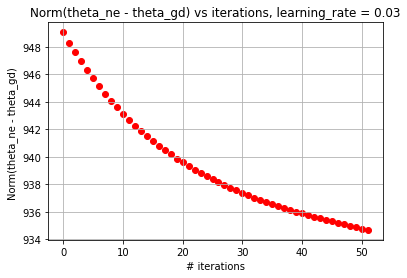

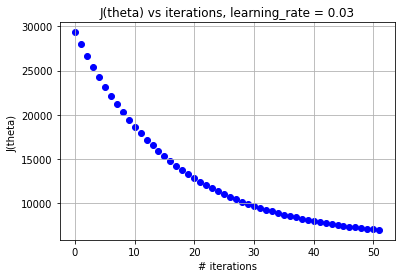

In [61]:
#'α=0.03, iter=52' 
# Plot norm #############################################
plt.scatter(range(len(theta_diff)), theta_diff,  color='red')

plt.xticks(())
plt.yticks(())
plt.yscale('linear')
plt.xscale('linear')
plt.title('Norm(theta_ne - theta_gd) vs iterations, learning_rate = {}'.format(learning_rate))
plt.xlabel("# iterations")
plt.ylabel("Norm(theta_ne - theta_gd) ")
plt.grid(True)
plt.show()
#############################################

# Plot costs #############################################
plt.scatter(range(len(costs)), costs,  color='blue')
plt.xticks(())
plt.yticks(())
plt.yscale('linear')
plt.xscale('linear')
plt.title('J(theta) vs iterations, learning_rate = {}'.format(learning_rate))
plt.xlabel("# iterations")
plt.ylabel("J(theta) ")
plt.grid(True)
plt.show()